# Kategorický tréning pomocou CNN

Použité dáta: ribbons
Navrhnutých viacero architektúr CNN, modely s najlepšími výsledkami sú: 


* Architektúra a výsledok modelu z EXPERIMENTU 1 (Kategórická krížová entropia)
* Architektúra a výsledok modelu z EXPERIMENTU 1 (focal loss)

-------------------------------------------------------------------------------------------

Konverzia obrázkov z formátu fits na png 

In [2]:
pip install h5py==3.7.0 astropy==6.1.4 parfive==2.1.0 Glymur==0.13.6 sunpy==6.0.3 numpy==1.24.4 hvpy==1.1.0 aiapy==0.7.4 opencv-python==4.10.0.84

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt

# cesta k priecinkom
base_folder = "./ribbons"
folders = ['train', 'validation', 'test']
classes = ['C', 'M', 'X']

# pocet konvertovanych obr pre kazdy riadok
folder_counts = {folder: {cls: 0 for cls in classes} for folder in folders}

# konverzia FITS suborov na PNG
for folder in folders:
    for cls in classes:
        input_dir = os.path.join(base_folder, folder, cls)
        output_dir = os.path.join(base_folder, folder, cls)

        for file_name in os.listdir(input_dir):
            if file_name.endswith('.fits'):
                fits_path = os.path.join(input_dir, file_name)
                png_path = os.path.join(output_dir, file_name.replace('.fits', '.png'))

                # nacitaniee FITS suboru
                with fits.open(fits_path) as hdul:
                    data = hdul[0].data

                # vytvorenie PNG
                plt.figure(figsize=(5, 5))
                plt.imshow(data, cmap='gray')
                plt.axis('off')
                plt.savefig(png_path, bbox_inches='tight', pad_inches=0)
                plt.close()

                print(f"Converted {fits_path} to {png_path}")
                folder_counts[folder][cls] += 1

# vypisanie poctov pre kazdy riadok
for folder in folders:
    print(f"\nPriečinok '{folder}':")
    for cls, count in folder_counts[folder].items():
        print(f"  Trieda '{cls}': {count} obrázkov")

# po dokonceni konverzie
total_count = sum(count for folder in folder_counts.values() for count in folder.values())
print(f"\nVšetky obrázky boli úspešne prekonvertované. Celkový počet: {total_count}")

Converted ./experiment1/train/C/20100713_1046_C_cutout.fits to ./experiment1/train/C/20100713_1046_C_cutout.png
Converted ./experiment1/train/C/20100713_1047_C_cutout.fits to ./experiment1/train/C/20100713_1047_C_cutout.png
Converted ./experiment1/train/C/20100713_1048_C_cutout.fits to ./experiment1/train/C/20100713_1048_C_cutout.png
Converted ./experiment1/train/C/20100713_1049_C_cutout.fits to ./experiment1/train/C/20100713_1049_C_cutout.png
Converted ./experiment1/train/C/20100713_1050_C_cutout.fits to ./experiment1/train/C/20100713_1050_C_cutout.png
Converted ./experiment1/train/C/20100713_1051_C_cutout.fits to ./experiment1/train/C/20100713_1051_C_cutout.png
Converted ./experiment1/train/C/20100713_1052_C_cutout.fits to ./experiment1/train/C/20100713_1052_C_cutout.png
Converted ./experiment1/train/C/20100713_1053_C_cutout.fits to ./experiment1/train/C/20100713_1053_C_cutout.png
Converted ./experiment1/train/C/20100713_1054_C_cutout.fits to ./experiment1/train/C/20100713_1054_C_cut

<b>Experimenty</b>

CNN 1. pokus

Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.
Epoch 1/50


2024-12-08 19:52:26.800416: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - ETA: 0s - loss: 0.3933 - accuracy: 0.8958

2024-12-08 20:03:38.746810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - 717s 990ms/step - loss: 0.3933 - accuracy: 0.8958 - val_loss: 0.3663 - val_accuracy: 0.9068
Epoch 2/50
724/724 [==============================] - 659s 910ms/step - loss: 0.3637 - accuracy: 0.8976 - val_loss: 0.3571 - val_accuracy: 0.9068
Epoch 3/50
724/724 [==============================] - 659s 910ms/step - loss: 0.3609 - accuracy: 0.8976 - val_loss: 0.3515 - val_accuracy: 0.9068
Epoch 4/50
724/724 [==============================] - 662s 915ms/step - loss: 0.3570 - accuracy: 0.8976 - val_loss: 0.3363 - val_accuracy: 0.9068
Epoch 5/50
724/724 [==============================] - 668s 923ms/step - loss: 0.3372 - accuracy: 0.8976 - val_loss: 0.2968 - val_accuracy: 0.9068
Epoch 6/50
724/724 [==============================] - 671s 926ms/step - loss: 0.3147 - accuracy: 0.8976 - val_loss: 0.2875 - val_accuracy: 0.9068
Epoch 7/50
724/724 [==============================] - 672s 928ms/step - loss: 0.2980 - accuracy: 0.8977 - val_loss: 0.2799 - val_accura

2024-12-08 23:06:10.878317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 67s 333ms/step - loss: 0.2471 - accuracy: 0.9042
Test Loss: 0.2471170723438263
Test Accuracy: 0.9041692614555359


2024-12-08 23:07:18.209279: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 63s 315ms/step


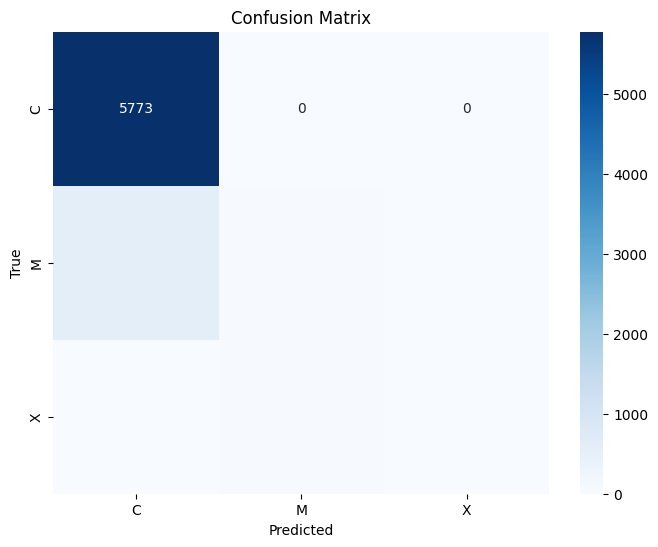

              precision    recall  f1-score   support

           C       0.91      1.00      0.95      5773
           M       0.56      0.06      0.11       611
           X       0.00      0.00      0.00        44

    accuracy                           0.90      6428
   macro avg       0.49      0.35      0.36      6428
weighted avg       0.87      0.90      0.87      6428



In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# nastavenia priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# generatory pre data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# vytvorenie modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# callback pre early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping]
)

# vyhodnotenie na testovacej mnozine
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ulozenie modelu
model.save("solar_flare_cnn_model.h5")

CNN pokus 2

In [20]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavenia priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# generatory dat
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# definicia modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # upravene pre 3 triedy
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# callback pre early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping]
)

# vyhodnotenie na testovacej mnozine
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# sprava o klasifikacii
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ulozenie modelu
model.save("solar_flare_cnn_model2.h5")

Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.
Epoch 1/50


2024-12-09 22:13:08.709528: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - ETA: 0s - loss: 0.3985 - accuracy: 0.8957

2024-12-09 22:24:15.468503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - 713s 984ms/step - loss: 0.3985 - accuracy: 0.8957 - val_loss: 0.3517 - val_accuracy: 0.9068
Epoch 2/50
724/724 [==============================] - 661s 913ms/step - loss: 0.3605 - accuracy: 0.8976 - val_loss: 0.3481 - val_accuracy: 0.9068
Epoch 3/50
724/724 [==============================] - 654s 903ms/step - loss: 0.3430 - accuracy: 0.8976 - val_loss: 0.2958 - val_accuracy: 0.9068
Epoch 4/50
724/724 [==============================] - 653s 902ms/step - loss: 0.3162 - accuracy: 0.8976 - val_loss: 0.2727 - val_accuracy: 0.9068
Epoch 5/50
278/724 [==========>...................] - ETA: 6:05 - loss: 0.2960 - accuracy: 0.9006

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



724/724 [==============================] - 660s 911ms/step - loss: 0.2541 - accuracy: 0.9107 - val_loss: 0.2601 - val_accuracy: 0.9123
Epoch 20/50
724/724 [==============================] - 658s 909ms/step - loss: 0.2556 - accuracy: 0.9107 - val_loss: 0.2916 - val_accuracy: 0.8940
Epoch 21/50
724/724 [==============================] - 660s 912ms/step - loss: 0.2517 - accuracy: 0.9117 - val_loss: 0.3094 - val_accuracy: 0.8851
Epoch 22/50
724/724 [==============================] - 664s 917ms/step - loss: 0.2560 - accuracy: 0.9116 - val_loss: 0.2414 - val_accuracy: 0.9165


2024-12-10 02:17:53.850648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 66s 329ms/step - loss: 0.2325 - accuracy: 0.9093
Test Loss: 0.23251532018184662
Test Accuracy: 0.9093030691146851


2024-12-10 02:19:00.384941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


159/201 [======================>.......] - ETA: 13s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



CNN pokus 3

Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.
Epoch 1/50


2024-12-10 13:58:52.923205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - ETA: 0s - loss: 0.3934 - accuracy: 0.8951

2024-12-10 14:09:57.100651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - 709s 977ms/step - loss: 0.3934 - accuracy: 0.8951 - val_loss: 0.3578 - val_accuracy: 0.9068
Epoch 2/50
724/724 [==============================] - 647s 894ms/step - loss: 0.3661 - accuracy: 0.8976 - val_loss: 0.3443 - val_accuracy: 0.9068
Epoch 3/50
724/724 [==============================] - 650s 898ms/step - loss: 0.3455 - accuracy: 0.8976 - val_loss: 0.3161 - val_accuracy: 0.9068
Epoch 4/50
724/724 [==============================] - 655s 904ms/step - loss: 0.3329 - accuracy: 0.8975 - val_loss: 0.3202 - val_accuracy: 0.9068
Epoch 5/50
724/724 [==============================] - 716s 988ms/step - loss: 0.3143 - accuracy: 0.8976 - val_loss: 0.2934 - val_accuracy: 0.9068
Epoch 6/50
724/724 [==============================] - 707s 977ms/step - loss: 0.2967 - accuracy: 0.8979 - val_loss: 0.2661 - val_accuracy: 0.9068
Epoch 7/50
724/724 [==============================] - 653s 902ms/step - loss: 0.2929 - accuracy: 0.8989 - val_loss: 0.2671 - val_accura

2024-12-10 16:55:45.841976: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 69s 346ms/step - loss: 0.2486 - accuracy: 0.9054
Test Loss: 0.24864602088928223
Test Accuracy: 0.905413806438446


2024-12-10 16:56:55.737338: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 60s 300ms/step


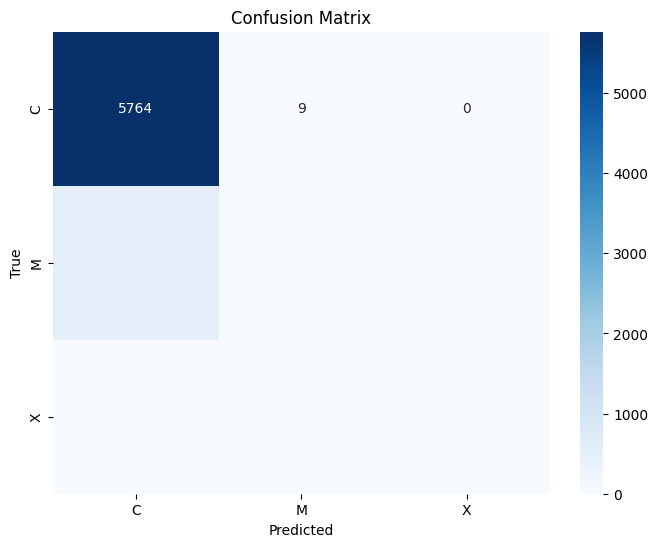

              precision    recall  f1-score   support

           C       0.91      1.00      0.95      5773
           M       0.56      0.09      0.16       611
           X       0.00      0.00      0.00        44

    accuracy                           0.91      6428
   macro avg       0.49      0.36      0.37      6428
weighted avg       0.87      0.91      0.87      6428



In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavenia priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# generátory dát
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# definícia modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # prispôsobené pre 3 triedy
])

# kompilácia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# callback pre skoré zastavenie
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# trénovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping]
)

# vyhodnotenie na testovacej množine
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# sprava o klasifikacii
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ulozenie modelu
model.save("solar_flare_cnn_model3.h5")

CNN pokus 4 + vahovanie

Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.
Class weights: {0: 0.37134193299961493, 1: 3.448815377738042, 2: 58.446969696969695}
Epoch 1/50


2024-12-10 22:16:41.375991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - ETA: 0s - loss: 1.2372 - accuracy: 0.2048

2024-12-10 22:27:55.961070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - 720s 993ms/step - loss: 1.2372 - accuracy: 0.2048 - val_loss: 1.1165 - val_accuracy: 0.0229
Epoch 2/50
724/724 [==============================] - 660s 911ms/step - loss: 1.0921 - accuracy: 0.0773 - val_loss: 1.0943 - val_accuracy: 0.0450
Epoch 3/50
724/724 [==============================] - 654s 903ms/step - loss: 1.1013 - accuracy: 0.1886 - val_loss: 1.1198 - val_accuracy: 0.0377
Epoch 4/50
724/724 [==============================] - 659s 910ms/step - loss: 1.1140 - accuracy: 0.1407 - val_loss: 1.1039 - val_accuracy: 0.0128
Epoch 5/50
724/724 [==============================] - 659s 910ms/step - loss: 1.1039 - accuracy: 0.2561 - val_loss: 1.1073 - val_accuracy: 0.0272
Epoch 6/50
724/724 [==============================] - 658s 909ms/step - loss: 1.0918 - accuracy: 0.1043 - val_loss: 1.0683 - val_accuracy: 0.7679
Epoch 7/50
724/724 [==============================] - 655s 904ms/step - loss: 1.0941 - accuracy: 0.4211 - val_loss: 1.1081 - val_accura

2024-12-11 00:17:56.177074: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 67s 331ms/step - loss: 1.0523 - accuracy: 0.7911
Test Loss: 1.0522874593734741
Test Accuracy: 0.7910703420639038


2024-12-11 00:19:03.238616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 62s 307ms/step


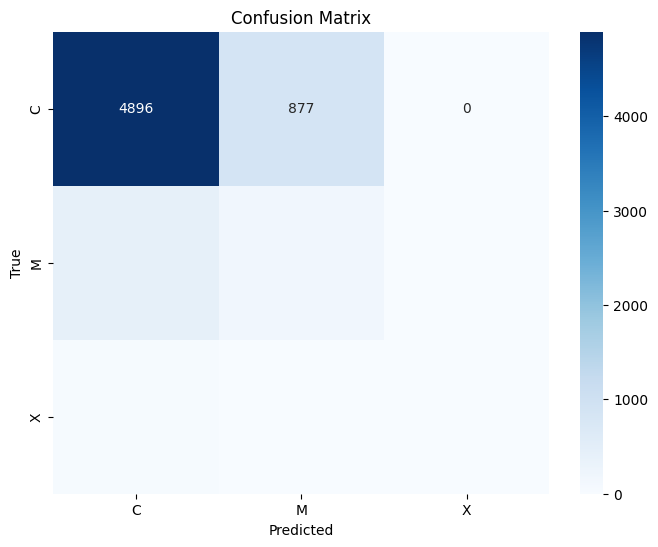

              precision    recall  f1-score   support

           C       0.91      0.85      0.88      5773
           M       0.18      0.31      0.23       611
           X       0.00      0.00      0.00        44

    accuracy                           0.79      6428
   macro avg       0.36      0.39      0.37      6428
weighted avg       0.84      0.79      0.81      6428



In [28]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavenia priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# generátory dát pre trénovaciu množinu s augmentáciou
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# generátor dát pre testovaciu a validačnú množinu (iba reskalovanie)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# načítanie dát z trénovacieho priečinka
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
# načítanie dát z validačného priečinka
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
# načítanie dát z testovacieho priečinka, bez miešania
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# vypocet vah tried pre nevyvážené dáta
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
# vahy
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("váhy tried:", class_weights_dict)

# DEFINICIA modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # vystupna vrstva s 3 triedami
])

# kompilácia modelu s optimalizátorom, funkciou straty a metrikami
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# definícia callbacku pre skoré zastavenie trénovania
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# trenovanie modelu s generátormi a váhami tried
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    class_weight=class_weights_dict,  # použitie vypocitanzch vah tried
    callbacks=[early_stopping]
)

# vyhodnotenie modelu na testovacej množine
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"test loss: {test_loss}")
print(f"test accuracy: {test_accuracy}")

# predikcie na testovacej množine
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# výpočet a zobrazenie confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('matica zámen')
plt.xlabel('predikované')
plt.ylabel('skutočné')
plt.show()

# výpis správy o klasifikácii
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# uloženie trénovaného modelu
model.save("solar_flare_cnn_model4.h5")

CNN 5 pokus

In [30]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavenia priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# generátory dát
train_datagen = ImageDataGenerator( # toto vykreslit
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# vypocet vah tried
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# uprava vah pre triedu x
class_weights_dict[class_indices['X']] *= 2.0  # zvysenie vahy pre x
print("Class weights:", class_weights_dict)

# vlastna funkcia pre focal loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_sum(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss

# definicia modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # uprava pre 3 triedy
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=['accuracy']
)

# callback pre skore zastavenie
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

# vyhodnotenie na testovacej mnozine
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# sprava o klasifikacii
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ulozenie modelu
model.save("solar_flare_cnn_model5.h5")

Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.
Class weights: {0: 0.37134193299961493, 1: 3.448815377738042, 2: 116.89393939393939}
Epoch 1/100


2024-12-13 00:15:13.280428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - ETA: 0s - loss: 2.8048 - accuracy: 0.8964

2024-12-13 00:27:11.731641: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - 767s 1s/step - loss: 2.8048 - accuracy: 0.8964 - val_loss: 2.3276 - val_accuracy: 0.9068
Epoch 2/100
724/724 [==============================] - 724s 1000ms/step - loss: 2.6071 - accuracy: 0.8976 - val_loss: 1.6631 - val_accuracy: 0.9068
Epoch 3/100
724/724 [==============================] - 726s 1s/step - loss: 2.5522 - accuracy: 0.8976 - val_loss: 1.8217 - val_accuracy: 0.9068
Epoch 4/100
724/724 [==============================] - 732s 1s/step - loss: 2.5437 - accuracy: 0.8976 - val_loss: 1.6047 - val_accuracy: 0.9068
Epoch 5/100
117/724 [===>..........................] - ETA: 8:37 - loss: 2.2142 - accuracy: 0.9025

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



724/724 [==============================] - 717s 990ms/step - loss: 1.8700 - accuracy: 0.9053 - val_loss: 1.2593 - val_accuracy: 0.9076
Epoch 18/100
724/724 [==============================] - 723s 998ms/step - loss: 1.8354 - accuracy: 0.9057 - val_loss: 1.1419 - val_accuracy: 0.9099
Epoch 19/100
724/724 [==============================] - 716s 988ms/step - loss: 1.7750 - accuracy: 0.9072 - val_loss: 1.2331 - val_accuracy: 0.9107
Epoch 20/100
724/724 [==============================] - 717s 990ms/step - loss: 1.7796 - accuracy: 0.9068 - val_loss: 1.1260 - val_accuracy: 0.9208
Epoch 21/100
319/724 [============>.................] - ETA: 6:09 - loss: 1.7077 - accuracy: 0.9079

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



CNN 6 pokus

Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.
Class weights: {0: 0.37134193299961493, 1: 3.448815377738042, 2: 58.446969696969695}
Epoch 1/100


2024-12-11 08:14:58.896997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - ETA: 0s - loss: 1.1476 - accuracy: 0.3991

2024-12-11 08:27:51.203601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


724/724 [==============================] - 824s 1s/step - loss: 1.1476 - accuracy: 0.3991 - val_loss: 1.1255 - val_accuracy: 0.0283
Epoch 2/100
724/724 [==============================] - 782s 1s/step - loss: 1.0949 - accuracy: 0.3201 - val_loss: 1.0944 - val_accuracy: 0.0543
Epoch 3/100
724/724 [==============================] - 801s 1s/step - loss: 1.1152 - accuracy: 0.1894 - val_loss: 1.1036 - val_accuracy: 0.0349
Epoch 4/100
724/724 [==============================] - 798s 1s/step - loss: 1.0803 - accuracy: 0.1379 - val_loss: 1.0108 - val_accuracy: 0.5415
Epoch 5/100
724/724 [==============================] - 793s 1s/step - loss: 1.0896 - accuracy: 0.1433 - val_loss: 1.1006 - val_accuracy: 0.1052
Epoch 6/100
724/724 [==============================] - 818s 1s/step - loss: 1.1061 - accuracy: 0.1660 - val_loss: 1.0061 - val_accuracy: 0.3886
Epoch 7/100
724/724 [==============================] - 785s 1s/step - loss: 1.0681 - accuracy: 0.2837 - val_loss: 0.8403 - val_accuracy: 0.8463
Epoc

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



724/724 [==============================] - 672s 929ms/step - loss: 0.8919 - accuracy: 0.6273 - val_loss: 0.6675 - val_accuracy: 0.9022
Epoch 20/100
724/724 [==============================] - 855s 1s/step - loss: 0.8832 - accuracy: 0.6515 - val_loss: 0.6380 - val_accuracy: 0.9072
Epoch 21/100
724/724 [==============================] - 898s 1s/step - loss: 0.8730 - accuracy: 0.6463 - val_loss: 0.6332 - val_accuracy: 0.8998
Epoch 22/100
724/724 [==============================] - 743s 1s/step - loss: 0.8764 - accuracy: 0.6490 - val_loss: 0.6382 - val_accuracy: 0.9064
Epoch 23/100
724/724 [==============================] - 684s 945ms/step - loss: 0.8570 - accuracy: 0.6488 - val_loss: 0.5305 - val_accuracy: 0.9037
Epoch 24/100
724/724 [==============================] - 650s 898ms/step - loss: 0.8506 - accuracy: 0.6140 - val_loss: 0.4895 - val_accuracy: 0.9037
Epoch 25/100
724/724 [==============================] - 661s 914ms/step - loss: 0.8668 - accuracy: 0.6328 - val_loss: 0.5112 - val_acc

2024-12-11 14:40:50.161403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 75s 374ms/step - loss: 0.5056 - accuracy: 0.8930
Test Loss: 0.5056483745574951
Test Accuracy: 0.8929682374000549


2024-12-11 14:42:05.686161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


201/201 [==============================] - 61s 305ms/step


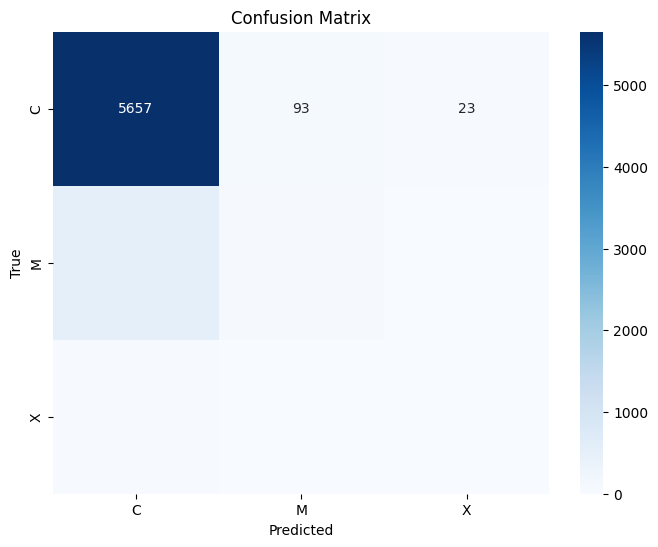

              precision    recall  f1-score   support

           C       0.91      0.98      0.94      5773
           M       0.44      0.14      0.21       611
           X       0.00      0.00      0.00        44

    accuracy                           0.89      6428
   macro avg       0.45      0.37      0.38      6428
weighted avg       0.86      0.89      0.87      6428



In [29]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavenia priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# generátory dát
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# vypocet vah tried
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weights_dict)

# definicia modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # uprava pre 3 triedy
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# callback pre skore zastavenie
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    class_weight=class_weights_dict,  # pridanie vah tried
    callbacks=[early_stopping]
)

# vyhodnotenie na testovacej mnozine
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a matica zamien
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# sprava o klasifikacii
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ulozenie modelu
model.save("solar_flare_cnn_model6.h5")

CNN pokus 7

Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.


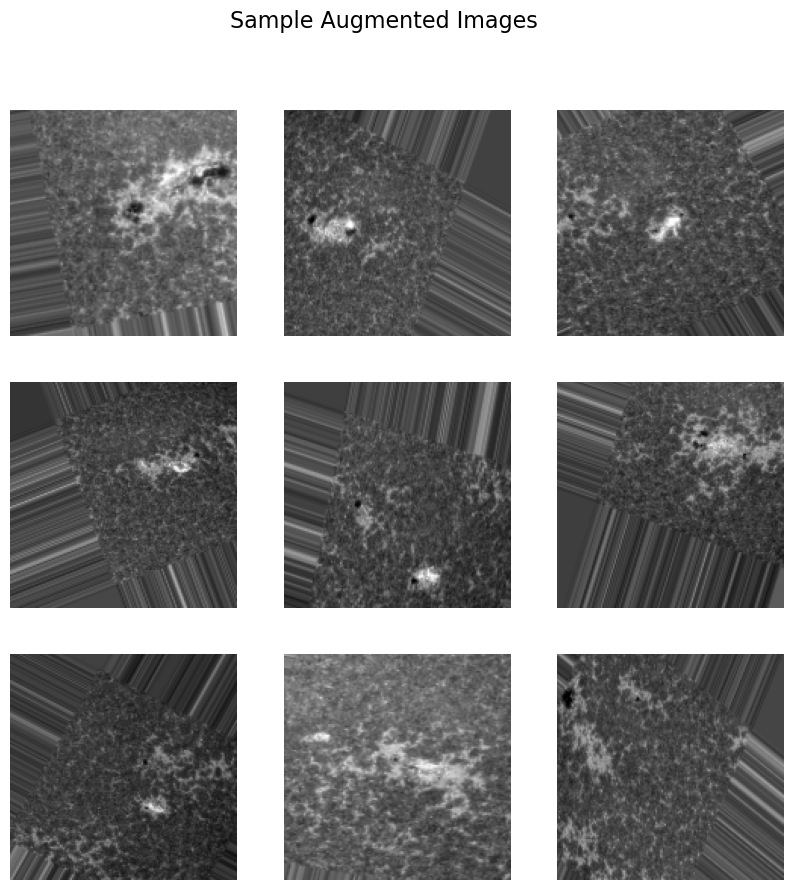

Class weights: {0: 0.37134193299961493, 1: 3.448815377738042, 2: 116.89393939393939}
Epoch 1/100
724/724 [==============================] - 683s 943ms/step - loss: 2.9862 - accuracy: 0.8965 - val_loss: 2.5726 - val_accuracy: 0.9068
Epoch 2/100
724/724 [==============================] - 619s 855ms/step - loss: 2.5936 - accuracy: 0.8976 - val_loss: 1.7404 - val_accuracy: 0.9068
Epoch 3/100
724/724 [==============================] - 629s 869ms/step - loss: 2.4675 - accuracy: 0.8976 - val_loss: 1.7946 - val_accuracy: 0.9068
Epoch 4/100
724/724 [==============================] - 635s 877ms/step - loss: 2.4725 - accuracy: 0.8976 - val_loss: 1.5749 - val_accuracy: 0.9068
Epoch 5/100
724/724 [==============================] - 799s 1s/step - loss: 2.4875 - accuracy: 0.8976 - val_loss: 1.5777 - val_accuracy: 0.9068
Epoch 6/100
724/724 [==============================] - 812s 1s/step - loss: 2.4215 - accuracy: 0.8976 - val_loss: 1.5221 - val_accuracy: 0.9068
Epoch 7/100
724/724 [==================

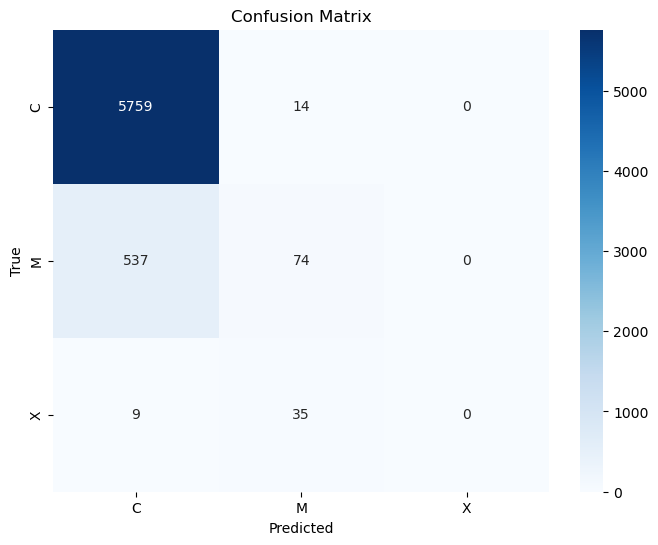

              precision    recall  f1-score   support

           C       0.91      1.00      0.95      5773
           M       0.60      0.12      0.20       611
           X       0.00      0.00      0.00        44

    accuracy                           0.91      6428
   macro avg       0.51      0.37      0.39      6428
weighted avg       0.88      0.91      0.88      6428



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavenia priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# generátory dát
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# vizualizácia augmentovaných obrázkov
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Sample Augmented Images', fontsize=16)
plt.show()

# vypocet vah tried
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# uprava vah pre triedu x
class_weights_dict[class_indices['X']] *= 2.0  # zvysenie vahy pre x
print("Class weights:", class_weights_dict)

# vlastna funkcia pre focal loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_sum(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss

# definicia modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # s 1 nefunguje
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 triedy
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=['accuracy']
)

# callback pre skore zastavenie
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

# vyhodnotenie na testovacej mnozine
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(class_indices.values()))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# sprava o klasifikacii
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ulozenie modelu
model.save("solar_flare_cnn_model7.h5")

CNN pokus 8 uprava augumentacii v test

Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.


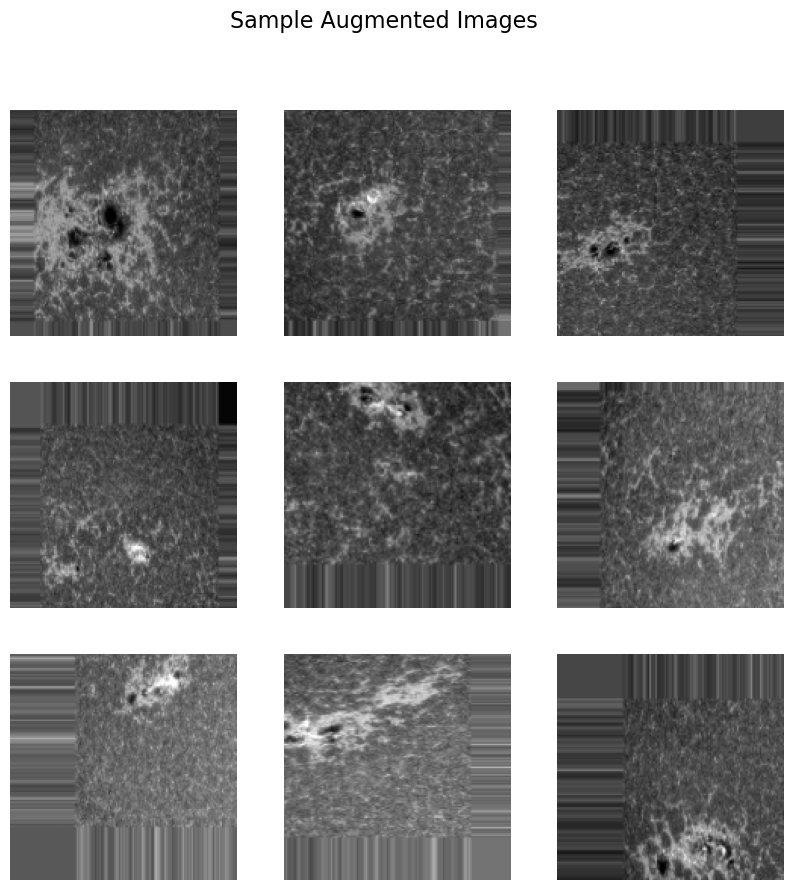

Class weights: {0: 0.37134193299961493, 1: 3.448815377738042, 2: 116.89393939393939}
Epoch 1/100
724/724 [==============================] - 700s 966ms/step - loss: 2.7866 - accuracy: 0.8968 - val_loss: 2.4011 - val_accuracy: 0.9068
Epoch 2/100
724/724 [==============================] - 625s 863ms/step - loss: 2.6672 - accuracy: 0.8976 - val_loss: 1.6232 - val_accuracy: 0.9068
Epoch 3/100
724/724 [==============================] - 633s 874ms/step - loss: 2.5192 - accuracy: 0.8976 - val_loss: 1.6210 - val_accuracy: 0.9068
Epoch 4/100
724/724 [==============================] - 637s 879ms/step - loss: 2.5295 - accuracy: 0.8976 - val_loss: 1.5302 - val_accuracy: 0.9068
Epoch 5/100
724/724 [==============================] - 702s 970ms/step - loss: 2.5334 - accuracy: 0.8976 - val_loss: 1.5189 - val_accuracy: 0.9068
Epoch 6/100
724/724 [==============================] - 668s 923ms/step - loss: 2.4928 - accuracy: 0.8976 - val_loss: 1.4838 - val_accuracy: 0.9068
Epoch 7/100
724/724 [============

KeyboardInterrupt: 

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavanie priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# trenovacie data = augumentacie
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# vizualizacia augumentovanych obrazkov
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Sample Augmented Images', fontsize=16)
plt.show()

# vahy tried
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# uprava vahy pre triedu X
class_weights_dict[class_indices['X']] *= 2.0  # Increase weight for X
print("Class weights:", class_weights_dict)

# custom Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_sum(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss

# definicia MODELU
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), 
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 triedy
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=['accuracy']
)

# Early stopping 
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

#cofusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(class_indices.values()))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# klasifikacny report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ulozenie modelu
model.save("solar_flare_cnn_model8.h5")

# <span style="color:green">Architektúra a výsledok modelu z EXPERIMENTU 1 (kategórická krížová entropia)</span>

Found 23157 images belonging to 3 classes.
Found 2610 images belonging to 3 classes.
Found 6451 images belonging to 3 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02413432..0.83705103].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05419566..1.0478513].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.011247015..1.0253075].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.040247303..1.0944775].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.011253822..0.9202779].


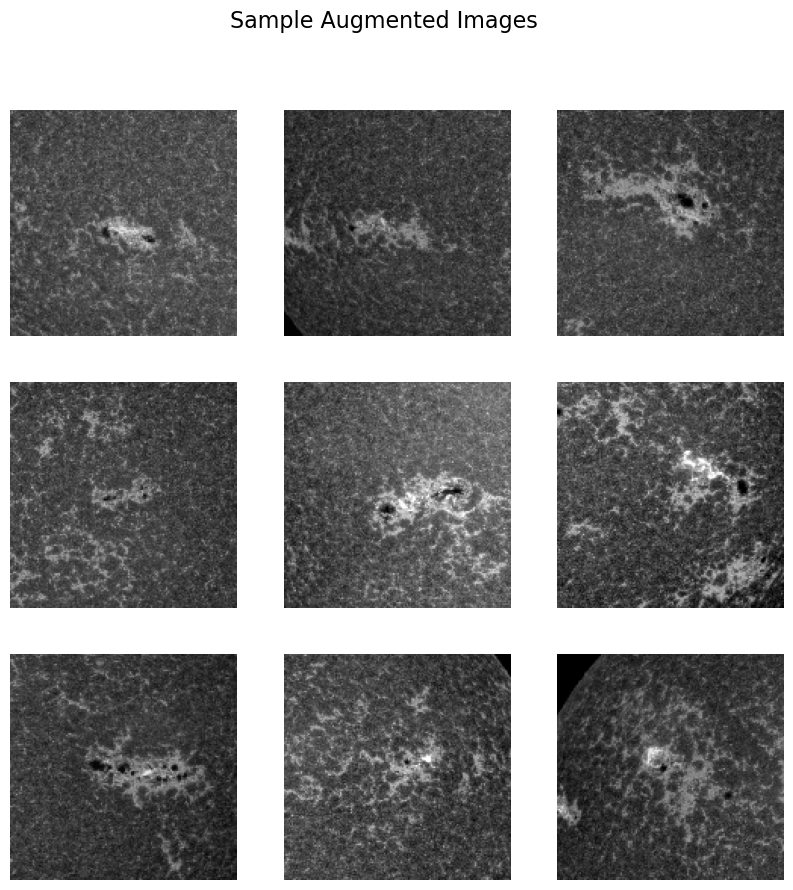

Class weights: {0: np.float64(0.37148082198373356), 1: np.float64(3.4367764915405163), 2: np.float64(116.95454545454545)}


/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 702s 966ms/step - accuracy: 0.3325 - loss: 1.8692 - val_accuracy: 0.0728 - val_loss: 1.1418
Epoch 2/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 625s 863ms/step - accuracy: 0.1257 - loss: 1.4473 - val_accuracy: 0.0789 - val_loss: 1.0858
Epoch 3/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 628s 867ms/step - accuracy: 0.1022 - loss: 1.3680 - val_accuracy: 0.1372 - val_loss: 1.0779
Epoch 4/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 624s 861ms/step - accuracy: 0.1467 - loss: 1.3694 - val_accuracy: 0.0690 - val_loss: 1.1287
Epoch 5/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 632s 872ms/step - accuracy: 0.1683 - loss: 1.2396 - val_accuracy: 0.0739 - val_loss: 1.1758
Epoch 6/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 629s 868ms/step - accuracy: 0.1487 - loss: 1.2243 - val_accuracy: 0.0693 - val_loss: 1.3429
Epoch 7/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 623s 861ms/step - accuracy: 0.3036 - loss: 1.2045 - val_accuracy: 0.1372 - val_loss: 1.3052
Epoch 8/100
724/724 ━━━━━━━━━━━━━━━━━━━━ 624s 862ms/step - accuracy: 

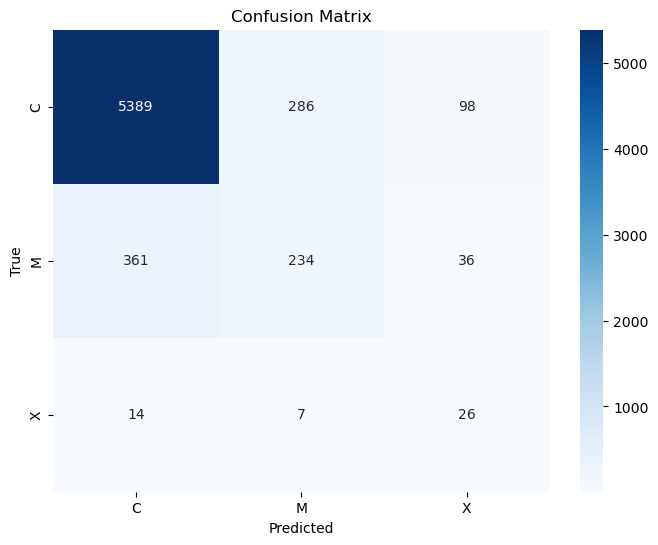

              precision    recall  f1-score   support

           C       0.93      0.93      0.93      5773
           M       0.44      0.37      0.40       631
           X       0.16      0.55      0.25        47

    accuracy                           0.88      6451
   macro avg       0.51      0.62      0.53      6451
weighted avg       0.88      0.88      0.88      6451



In [5]:
# kniznice
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavanie priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "valid")
test_dir = os.path.join(base_folder, "test")

# data genarator train images, pridany jas kontras
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    brightness_range=(0.8, 1.2),  # jas
    preprocessing_function=lambda x: tf.image.adjust_contrast(x, np.random.uniform(0.8, 1.2)), #kontras
    #zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ukzazka obrazkov ktore idu do train
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Sample Augmented Images', fontsize=16)
plt.show()

# pridanie vah pre triedy
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# uprava vahy pre triedu X
if 'X' in class_indices:
    class_weights_dict[class_indices['X']] *= 2.0  
print("Class weights:", class_weights_dict)

# definicia MODELU - softmax
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')  
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping 
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

# test loss/accuracy
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)  # predikovane hodnoty
y_true = test_generator.classes  # pravdive hodnoty

# confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_labels))))  

# vykreslenie confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("confusion_matrix.png", bbox_inches='tight', dpi=300)
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# ulozenie modelu
model.save("solar_flare_cnn_model9b.h5")

# <span style="color:green">Architektúra a výsledok modelu z EXPERIMENTU 1 (focal loss)</span>

2024-12-19 16:24:02.587546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 23145 images belonging to 3 classes.
Found 2576 images belonging to 3 classes.
Found 6428 images belonging to 3 classes.


2024-12-19 16:24:09.308665: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


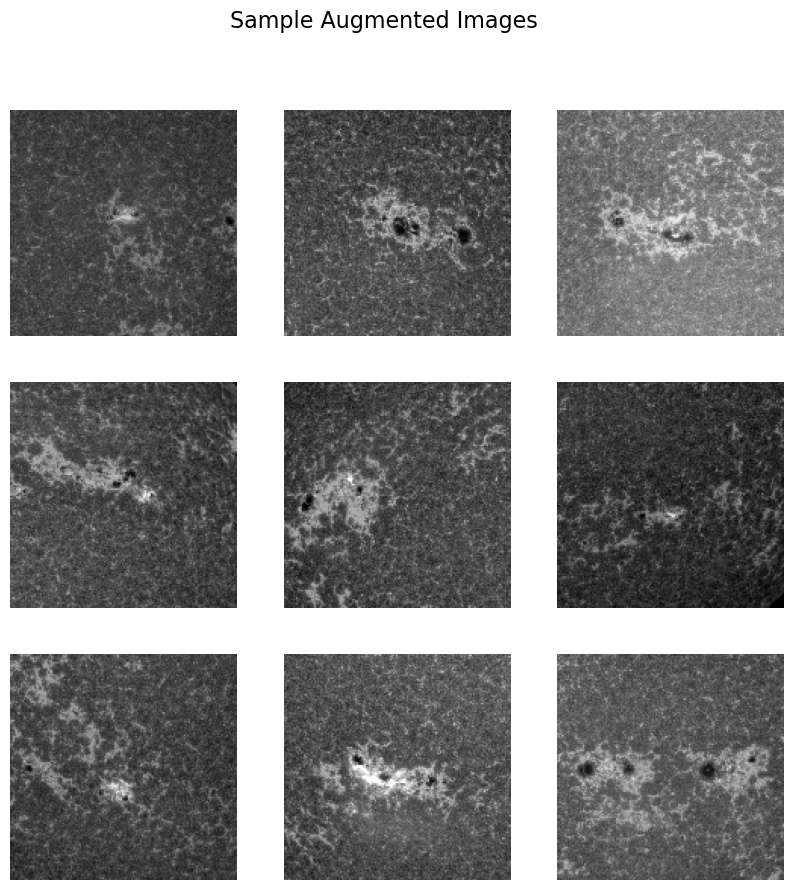

Class weights: {0: 0.37134193299961493, 1: 3.448815377738042, 2: 116.89393939393939}
Epoch 1/100
724/724 [==============================] - 856s 1s/step - loss: 3.2562 - accuracy: 0.8925 - val_loss: 2.8304 - val_accuracy: 0.9068
Epoch 2/100
724/724 [==============================] - 892s 1s/step - loss: 2.6905 - accuracy: 0.8976 - val_loss: 2.2484 - val_accuracy: 0.9068
Epoch 3/100
724/724 [==============================] - 882s 1s/step - loss: 2.6001 - accuracy: 0.8976 - val_loss: 3.0583 - val_accuracy: 0.9068
Epoch 4/100
724/724 [==============================] - 901s 1s/step - loss: 2.2653 - accuracy: 0.8976 - val_loss: 1.6838 - val_accuracy: 0.9068
Epoch 5/100
724/724 [==============================] - 819s 1s/step - loss: 2.0706 - accuracy: 0.8976 - val_loss: 1.6179 - val_accuracy: 0.9068
Epoch 6/100
724/724 [==============================] - 574s 793ms/step - loss: 1.9988 - accuracy: 0.8976 - val_loss: 1.4059 - val_accuracy: 0.9068
Epoch 7/100
724/724 [===========================

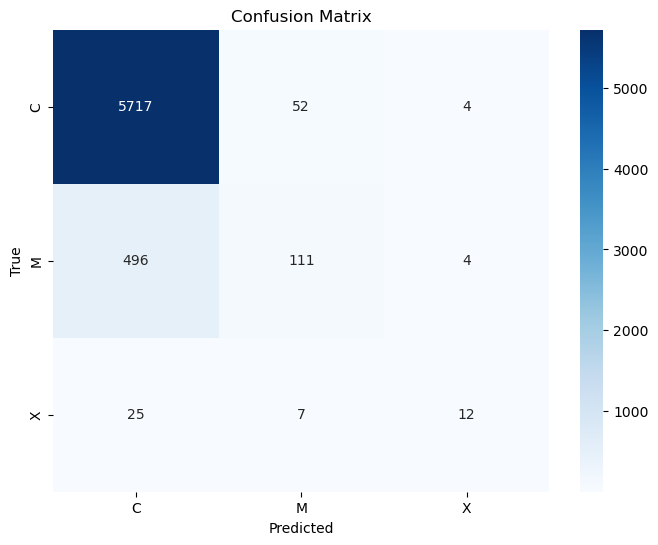

              precision    recall  f1-score   support

           C       0.92      0.99      0.95      5773
           M       0.65      0.18      0.28       611
           X       0.60      0.27      0.37        44

    accuracy                           0.91      6428
   macro avg       0.72      0.48      0.54      6428
weighted avg       0.89      0.91      0.88      6428



In [1]:
# kniznice
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# nastavanie priecinkov
base_folder = "./ribbons"
train_dir = os.path.join(base_folder, "train")
valid_dir = os.path.join(base_folder, "validation")
test_dir = os.path.join(base_folder, "test")

# data genarator train images, pridany jas kontras
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    brightness_range=(0.8, 1.2),  # jas
    preprocessing_function=lambda x: tf.image.adjust_contrast(x, np.random.uniform(0.8, 1.2)), #kontras
    #zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# ukzazka obrazkov ktore idu do train
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Sample Augmented Images', fontsize=16)
plt.show()

# pridanie vah pre triedy
class_labels = list(train_generator.class_indices.keys())
class_indices = train_generator.class_indices
class_counts = train_generator.classes

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_counts),
    y=class_counts
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# uprava vahy pre triedu X
if 'X' in class_indices:
    class_weights_dict[class_indices['X']] *= 2.0  
print("Class weights:", class_weights_dict)

# Custom Focal Loss
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_sum(alpha * tf.pow(1. - pt, gamma) * tf.math.log(pt))
    return loss

# definicia MODELU - softmax
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')  
])

# kompilacia modelu
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=focal_loss(alpha=0.25, gamma=2.0),
    metrics=['accuracy']
)

# Early stopping 
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

# trenovanie modelu
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

# test loss/accuracy
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# predikcie a confusion matrix
y_pred = np.argmax(model.predict(test_generator), axis=1)  # predikovane hodnoty
y_true = test_generator.classes  # pravdive hodnoty

# confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(len(class_labels))))  

# vykreslenie confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# ulozenie modelu
model.save("solar_flare_cnn_model9.h5")